# Sankey Diagram
As a project manager for various scrum teams with dependent tasks, a Sankey diagram is useful to visualize which team is relying on the other to remove any impediments. The dependencies are usually captured via JIRA, an issue tracking tool. The following shows the steps to clean the JIRA data with Python pandas library, creating the Sankey diagram in Python matplotlib library, and exporting the clean data to create more of an interactive visualization in Tableau.  

In [2]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 

%matplotlib inline                     

In [3]:
# Bring in necessary columns from JIRA export

df = pd.read_csv('Dependencies.csv', usecols=['Issue key', 'Labels'])

In [4]:
df.columns.tolist()

['Issue key', 'Labels']

In [5]:
df.shape

(112, 2)

In [6]:
df.head()

,Issue key,Labels
0,BUCS-11858,BUCS_Dependency_Champions_On_Systems
1,BUCS-11869,BUCS_Dependency_Champions_On_Systems
2,BUCS-11875,BUCS_Dependency_Champions_On_Systems
3,BUCS-11873,BUCS_Dependency_Champions_On_Systems
4,BUCS-11866,BUCS_Dependency_Champions_On_Systems


In [7]:
# Parsing strings to create columns for a "From" and "To". 

for team in df['Labels']:
    print(team.split("_")[2])

Champions
Champions
Champions
Champions
Champions
Champions
Spartans
Spartans
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Alpha
Alpha
Alpha
Spartans
Spartans
Spartans
Alpha
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Spartans
Alpha
Alpha
Spartans
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Spartans
Champions
Champions
Champions
Champions
Champions
Spartans


IndexError: list index out of range

In [8]:
# Parsing strings to create columns for a "From" and "To". 

for team in df['Labels']:
    print(team.split("_")[-1])

Systems
Systems
Systems
Systems
Systems
Alpha
Champions
Champions
Alpha
Alpha
Alpha
Alpha
Alpha
Alpha
Alpha
Alpha
Alpha
Alpha
External
Spartans
Champions
External
Champions
Alpha
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Champions
Systems
Systems
Systems
Spartans
External
Systems
Systems
Systems
Systems
Spartans
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Spartans
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Spartans
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Systems
Spartans
Systems
Systems
External
External
External
External
External
Champions
External
External
External
External
External
Champions
Champions
Champions
BUCS
Alpha
Champions
External
External


In [9]:
# Trying to figure out how to import the loop results into a new column in df

df['from'] = df['Labels'].str.split('_').str[2]
df

,Issue key,Labels,from
0,BUCS-11858,BUCS_Dependency_Champions_On_Systems,Champions
1,BUCS-11869,BUCS_Dependency_Champions_On_Systems,Champions
2,BUCS-11875,BUCS_Dependency_Champions_On_Systems,Champions
3,BUCS-11873,BUCS_Dependency_Champions_On_Systems,Champions
4,BUCS-11866,BUCS_Dependency_Champions_On_Systems,Champions
5,BUCS-11784,BUCS_Dependency_Champions_On_Alpha,Champions
6,BUCS-11748,BUCS_Dependency_Spartans_On_Champions,Spartans
7,BUCS-11749,BUCS_Dependency_Spartans_On_Champions,Spartans
8,BUCS-11519,BUCS_Dependency_Champions_On_Alpha,Champions
9,BUCS-11517,BUCS_Dependency_Champions_On_Alpha,Champions


In [10]:
# Create a column with dependency to

df['to'] = df['Labels'].str.split('_').str[-1]
df

,Issue key,Labels,from,to
0,BUCS-11858,BUCS_Dependency_Champions_On_Systems,Champions,Systems
1,BUCS-11869,BUCS_Dependency_Champions_On_Systems,Champions,Systems
2,BUCS-11875,BUCS_Dependency_Champions_On_Systems,Champions,Systems
3,BUCS-11873,BUCS_Dependency_Champions_On_Systems,Champions,Systems
4,BUCS-11866,BUCS_Dependency_Champions_On_Systems,Champions,Systems
5,BUCS-11784,BUCS_Dependency_Champions_On_Alpha,Champions,Alpha
6,BUCS-11748,BUCS_Dependency_Spartans_On_Champions,Spartans,Champions
7,BUCS-11749,BUCS_Dependency_Spartans_On_Champions,Spartans,Champions
8,BUCS-11519,BUCS_Dependency_Champions_On_Alpha,Champions,Alpha
9,BUCS-11517,BUCS_Dependency_Champions_On_Alpha,Champions,Alpha


In [13]:
# -*- coding: utf-8 -*-
"""
Produces simple Sankey Diagrams with matplotlib.
@author: Anneya Golob & marcomanz & pierre-sassoulas
                      .-.
                 .--.(   ).--.
      <-.  .-.-.(.->          )_  .--.
       `-`(     )-'             `)    )
         (o  o  )                `)`-'
        (      )                ,)
        ( ()  )                 )
         `---"\    ,    ,    ,/`
               `--' `--' `--'
                |  |   |   |
                |  |   |   |
                '  |   '   |
"""

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

class pySankeyException(Exception):
    pass
class NullsInFrame(pySankeyException):
    pass
class LabelMismatch(pySankeyException):
    pass

def check_data_matches_labels(labels, data, side):
    if len(labels >0):
        if isinstance(data, list):
            data = set(data)
        if isinstance(data, pd.Series):
            data = set(data.unique().tolist())
        if isinstance(labels, list):
            labels = set(labels)
        if labels != data:
            msg = "\n"
            if len(labels) <= 20:
                msg = "Labels: " + ",".join(labels) +"\n"
            if len(data) < 20:
                msg += "Data: " + ",".join(data)
            raise LabelMismatch('{0} labels and data do not match.{1}'.format(side, msg))
    


def sankey(left, right, leftWeight=None, rightWeight=None, colorDict=None,
           leftLabels=None, rightLabels=None, aspect=4, rightColor=False,
           fontsize=14, figure_name=None,closePlot=False):
    '''
    Make Sankey Diagram showing flow from left-->right

    Inputs:
        left = NumPy array of object labels on the left of the diagram
        right = NumPy array of corresponding labels on the right of the diagram
            len(right) == len(left)
        leftWeight = NumPy array of weights for each strip starting from the
            left of the diagram, if not specified 1 is assigned
        rightWeight = NumPy array of weights for each strip starting from the
            right of the diagram, if not specified the corresponding leftWeight
            is assigned
        colorDict = Dictionary of colors to use for each label
            {'label':'color'}
        leftLabels = order of the left labels in the diagram
        rightLabels = order of the right labels in the diagram
        aspect = vertical extent of the diagram in units of horizontal extent
        rightColor = If true, each strip in the diagram will be be colored
                    according to its left label
    Ouput:
        None
    '''
    if leftWeight is None:
        leftWeight = []
    if rightWeight is None:
        rightWeight = []
    if leftLabels is None:
        leftLabels = []
    if rightLabels is None:
        rightLabels = []
    # Check weights
    if len(leftWeight) == 0:
        leftWeight = np.ones(len(left))

    if len(rightWeight) == 0:
        rightWeight = leftWeight

    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')

    # Create Dataframe
    if isinstance(left, pd.Series):
        left = left.reset_index(drop=True)
    if isinstance(right, pd.Series):
        right = right.reset_index(drop=True)
    df = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                       'rightWeight': rightWeight}, index=range(len(left)))
    
    if len(df[(df.left.isnull()) | (df.right.isnull())]):
        raise NullsInFrame('Sankey graph does not support null values.')

    # Identify all labels that appear 'left' or 'right'
    allLabels = pd.Series(np.r_[df.left.unique(), df.right.unique()]).unique()

    # Identify left labels
    if len(leftLabels) == 0:
        leftLabels = pd.Series(df.left.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, df['left'], 'left')

    # Identify right labels
    if len(rightLabels) == 0:
        rightLabels = pd.Series(df.right.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, df['right'], 'right')
    # If no colorDict given, make one
    if colorDict is None:
        colorDict = {}
        pal = "hls"
        cls = sns.color_palette(pal, len(allLabels))
        for i, l in enumerate(allLabels):
            colorDict[l] = cls[i]
    else:
        missing = [label for label in allLabels if label not in colorDict.keys()]
        if missing:
            raise RuntimeError('colorDict specified but missing values: '
                                '{}'.format(','.join(missing)))

    # Determine widths of individual strips
    ns_l = defaultdict()
    ns_r = defaultdict()
    for l in leftLabels:
        myD_l = {}
        myD_r = {}
        for l2 in rightLabels:
            myD_l[l2] = df[(df.left == l) & (df.right == l2)].leftWeight.sum()
            myD_r[l2] = df[(df.left == l) & (df.right == l2)].rightWeight.sum()
        ns_l[l] = myD_l
        ns_r[l] = myD_r

    # Determine positions of left label patches and total widths
    widths_left = defaultdict()
    for i, l in enumerate(leftLabels):
        myD = {}
        myD['left'] = df[df.left == l].leftWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['left']
        else:
            myD['bottom'] = widths_left[leftLabels[i - 1]]['top'] + 0.02 * df.leftWeight.sum()
            myD['top'] = myD['bottom'] + myD['left']
            topEdge = myD['top']
        widths_left[l] = myD

    # Determine positions of right label patches and total widths
    widths_right = defaultdict()
    for i, l in enumerate(rightLabels):
        myD = {}
        myD['right'] = df[df.right == l].rightWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['right']
        else:
            myD['bottom'] = widths_right[rightLabels[i - 1]]['top'] + 0.02 * df.rightWeight.sum()
            myD['top'] = myD['bottom'] + myD['right']
            topEdge = myD['top']
        widths_right[l] = myD

    # Total vertical extent of diagram
    xMax = topEdge / aspect

    # Draw vertical bars on left and right of each  label's section & print label
    for l in leftLabels:
        plt.fill_between(
            [-0.02 * xMax, 0],
            2 * [widths_left[l]['bottom']],
            2 * [widths_left[l]['bottom'] + widths_left[l]['left']],
            color=colorDict[l],
            alpha=0.99
        )
        plt.text(
            -0.05 * xMax,
            widths_left[l]['bottom'] + 0.5 * widths_left[l]['left'],
            l,
            {'ha': 'right', 'va': 'center'},
            fontsize=fontsize
        )
    for l in rightLabels:
        plt.fill_between(
            [xMax, 1.02 * xMax], 2 * [widths_right[l]['bottom']],
            2 * [widths_right[l]['bottom'] + widths_right[l]['right']],
            color=colorDict[l],
            alpha=0.99
        )
        plt.text(
            1.05 * xMax, widths_right[l]['bottom'] + 0.5 * widths_right[l]['right'],
            l,
            {'ha': 'left', 'va': 'center'},
            fontsize=fontsize
        )

    # Plot strips
    for l in leftLabels:
        for l2 in rightLabels:
            lc = l
            if rightColor:
                lc = l2
            if len(df[(df.left == l) & (df.right == l2)]) > 0:
                # Create array of y values for each strip, half at left value, half at right, convolve
                ys_d = np.array(50 * [widths_left[l]['bottom']] + 50 * [widths_right[l2]['bottom']])
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_u = np.array(50 * [widths_left[l]['bottom'] + ns_l[l][l2]] + 50 * [widths_right[l2]['bottom'] + ns_r[l][l2]])
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

                # Update bottom edges at each label so next strip starts at the right place
                widths_left[l]['bottom'] += ns_l[l][l2]
                widths_right[l2]['bottom'] += ns_r[l][l2]
                plt.fill_between(
                    np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                    color=colorDict[lc]
                )
    plt.gca().axis('off')
    plt.gcf().set_size_inches(6, 6)
    if figure_name!=None:
        plt.savefig("{}.png".format(figure_name), bbox_inches='tight', dpi=150)
    if closePlot:
        plt.close()


In [25]:
df = df.dropna()
df

,Issue key,Labels,from,to
0,BUCS-11858,BUCS_Dependency_Champions_On_Systems,Champions,Systems
1,BUCS-11869,BUCS_Dependency_Champions_On_Systems,Champions,Systems
2,BUCS-11875,BUCS_Dependency_Champions_On_Systems,Champions,Systems
3,BUCS-11873,BUCS_Dependency_Champions_On_Systems,Champions,Systems
...,...,...,...,...
108,BUCS-11514,BUCS_Dependency_Champions_On_Alpha,Champions,Alpha
109,BUCS-10963,BUCS_Dependency_Spartans_On_Champions,Spartans,Champions
110,BUCS-11384,BUCS_Dependency_Alpha_On_External,Alpha,External
111,BUCS-11886,BUCS_Dependency_Champions_On_External,Champions,External


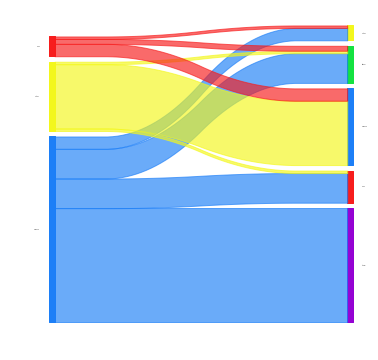

In [34]:
pd.options.display.max_rows=8
%matplotlib inline

colorDict =  {'Alpha':'#f71b1b','Champions':'#1b7ef7','Spartans':'#f3f71b',
              'External':'#12e23f', 'Systems':'#9400D3'}
sankey(df['from'], df['to'], aspect=20, colorDict=colorDict,
              fontsize=1, figure_name="Dependencies")

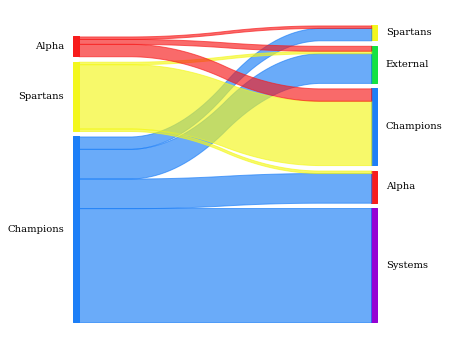

In [37]:
# Adding labels for axes

sankey(df['from'],df['to'],aspect=20,colorDict=colorDict,fontsize=10)
plt.gcf().set_size_inches(6,6)

In [38]:
# Validating visualization
df['from'].value_counts()


Champions    75
Spartans     28
Alpha         8
Name: from, dtype: int64

In [39]:
df['to'].value_counts()


Systems      46
Champions    31
External     15
Alpha        13
Spartans      6
Name: to, dtype: int64